In [ ]:
!pip install nvidia-cublas-cu12==12.1.3.1
!pip install nvidia-cuda-cupti-cu12==12.1.105
!pip install nvidia-cuda-nvrtc-cu12==12.1.105
!pip install nvidia-cuda-runtime-cu12==12.1.105
!pip install nvidia-cudnn-cu12==8.9.2.26
!pip install nvidia-cufft-cu12==11.0.2.54
!pip install nvidia-curand-cu12==10.3.2.106
!pip install nvidia-cusolver-cu12==11.4.5.107
!pip install nvidia-cusparse-cu12==12.1.0.106
!pip install nvidia-nvtx-cu12==12.1.105


  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cufft-cu12==11.0.2.54; platform_sys

In [ ]:
!pip install -U flaml
!pip install -U xgboost


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-60-9d48d6c76a0f>:22: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


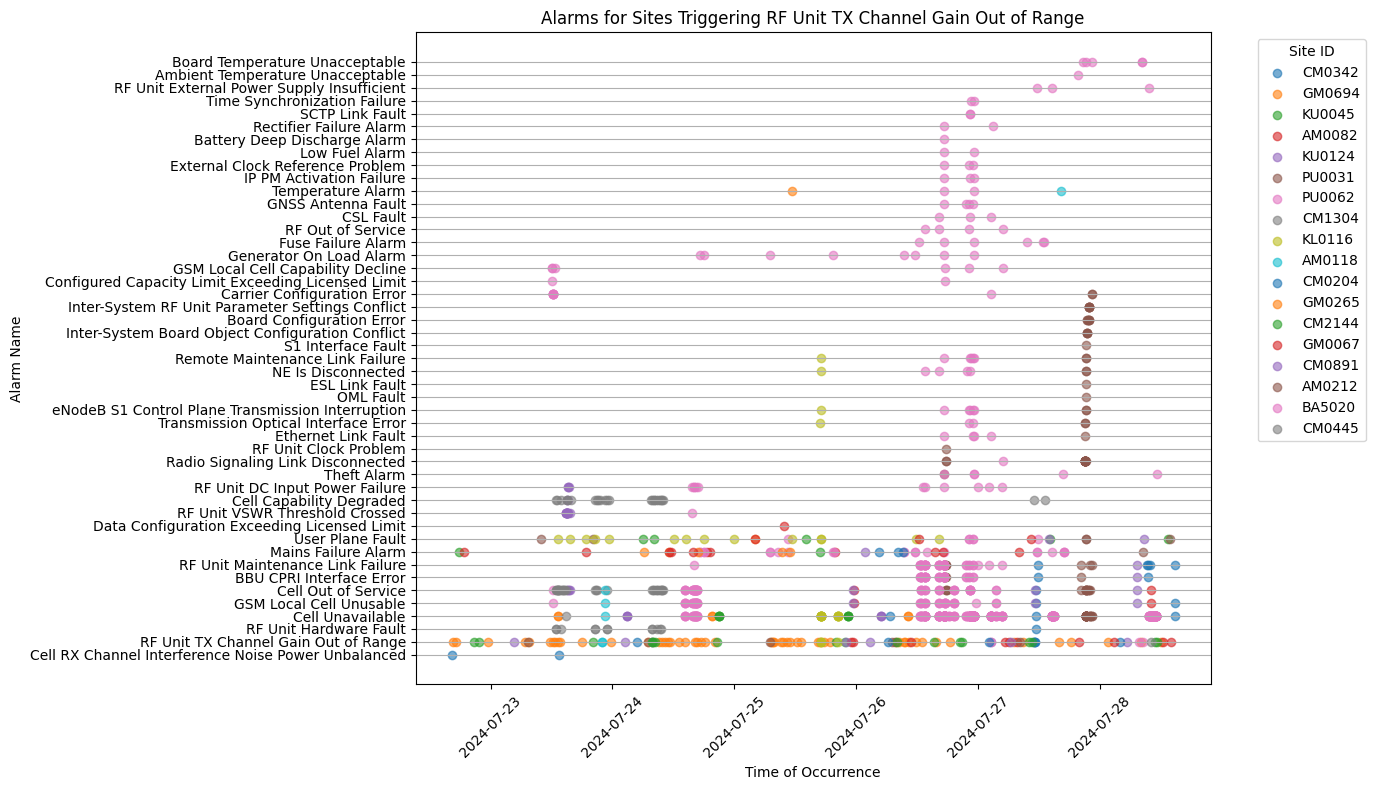

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive (if necessary)
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_25/3677_20240729_103909_1/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Sort by 'First Occurred On' in ascending order (earliest alarms first)
data = data.sort_values(by='First Occurred On', ascending=True)

# Convert 'First Occurred On' to datetime, handle errors and fill NaT with a default date
data['First Occurred On'] = pd.to_datetime(data['First Occurred On'], errors='coerce')

# Find all site IDs that had the alarm 'RF Unit TX Channel Gain Out of Range'
triggered_sites = data[data['Alarm Name'] == 'RF Unit TX Channel Gain Out of Range']['Site ID'].unique()

# Filter all alarms for these site IDs
filtered_alarms = data[data['Site ID'].isin(triggered_sites)]

# Plotting all alarms site-wise
plt.figure(figsize=(14, 8))

# Loop through each site and plot their alarms
for site_id in filtered_alarms['Site ID'].unique():
    site_data = filtered_alarms[filtered_alarms['Site ID'] == site_id]
    plt.scatter(site_data['First Occurred On'], site_data['Alarm Name'], label=site_id, alpha=0.6)

# Customize the plot
plt.title('Alarms for Sites Triggering RF Unit TX Channel Gain Out of Range')
plt.xlabel('Time of Occurrence')
plt.ylabel('Alarm Name')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show legend for different sites
plt.legend(title='Site ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-61-006b001d182e>:22: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


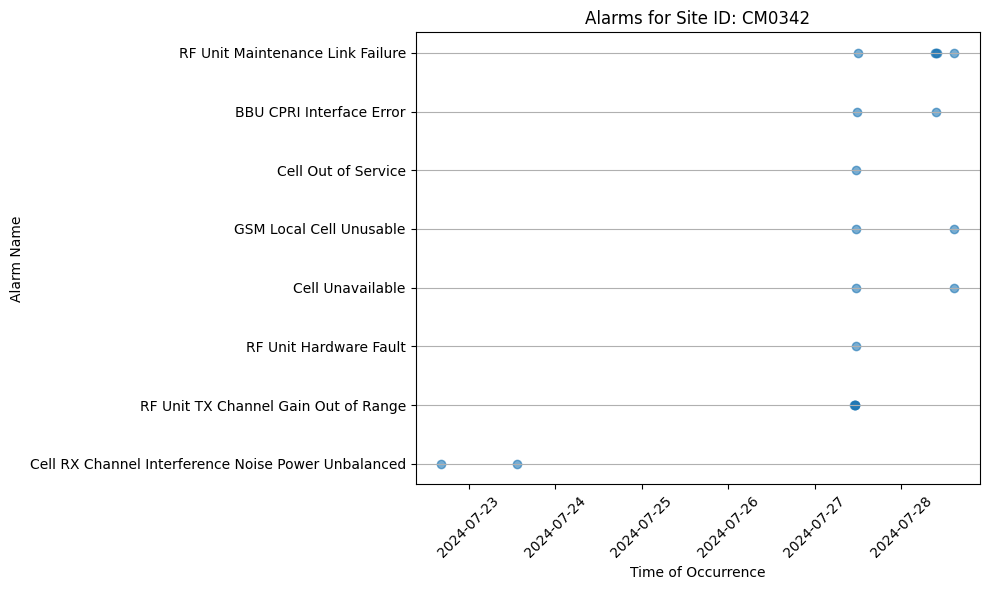

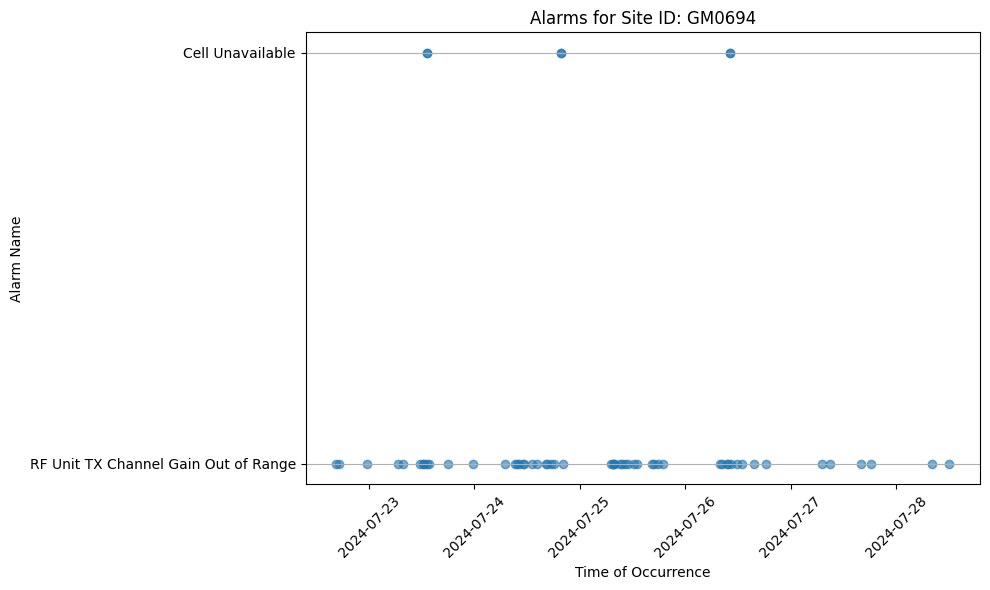

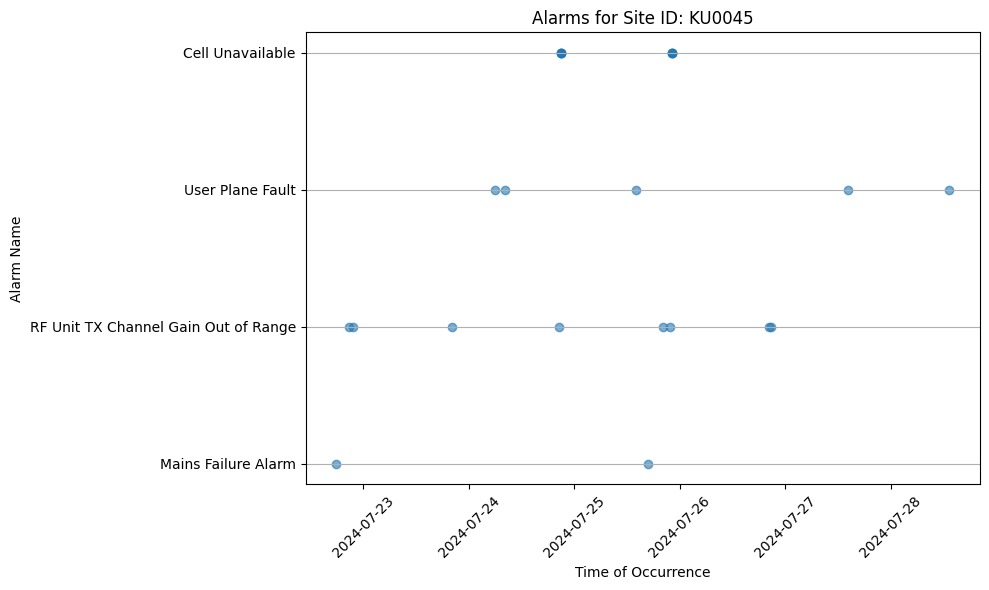

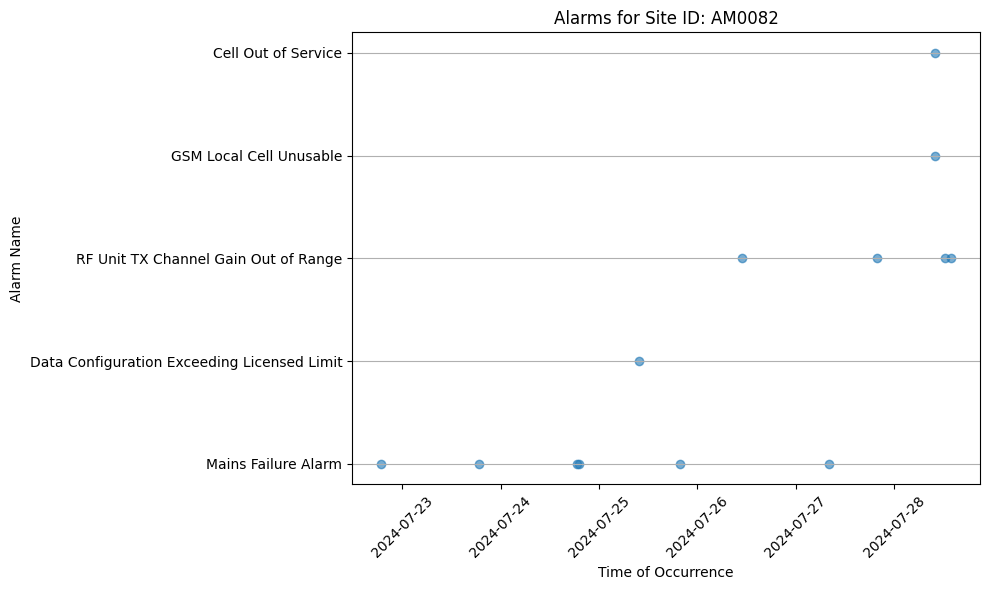

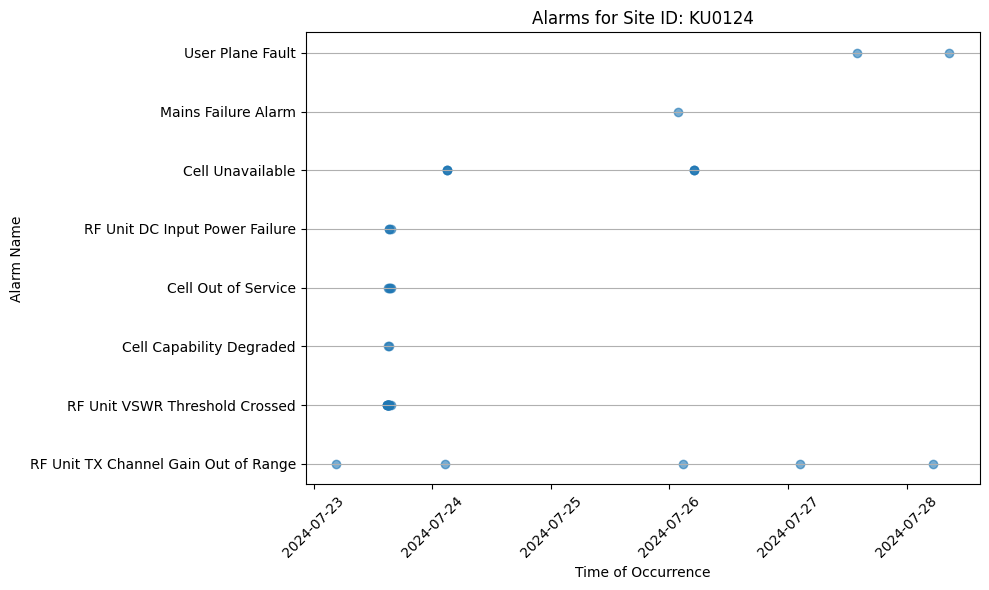

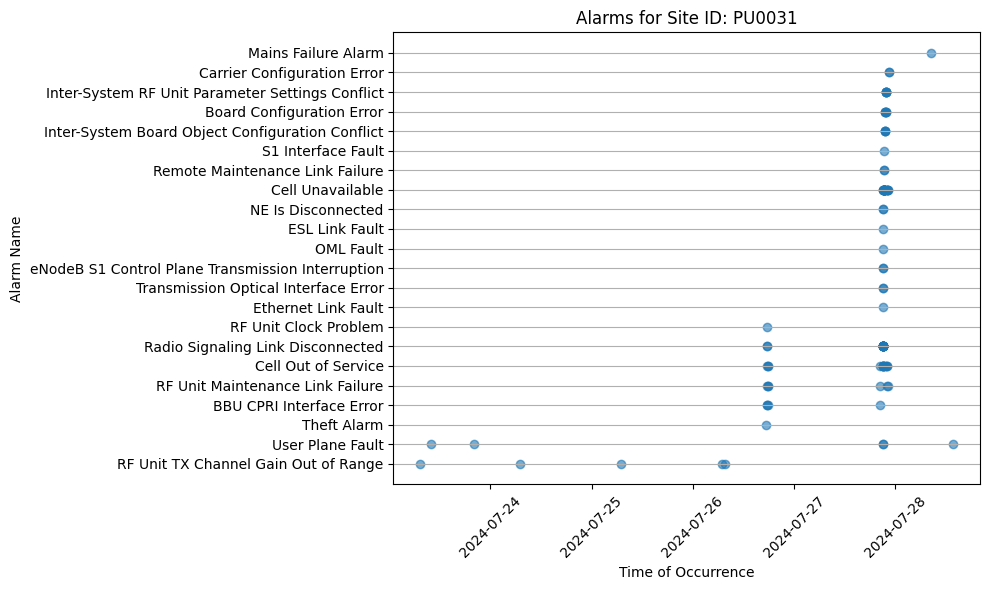

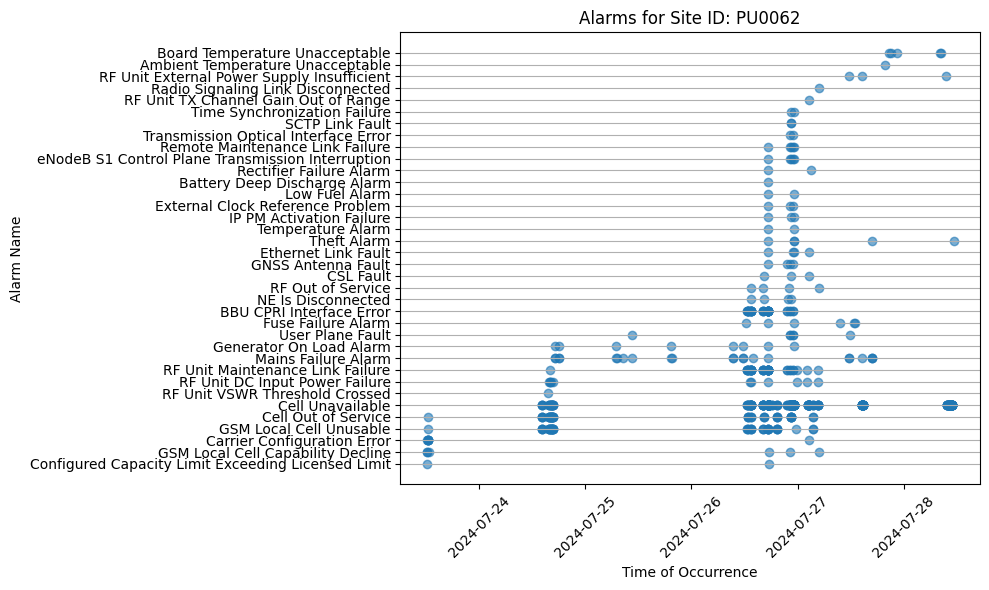

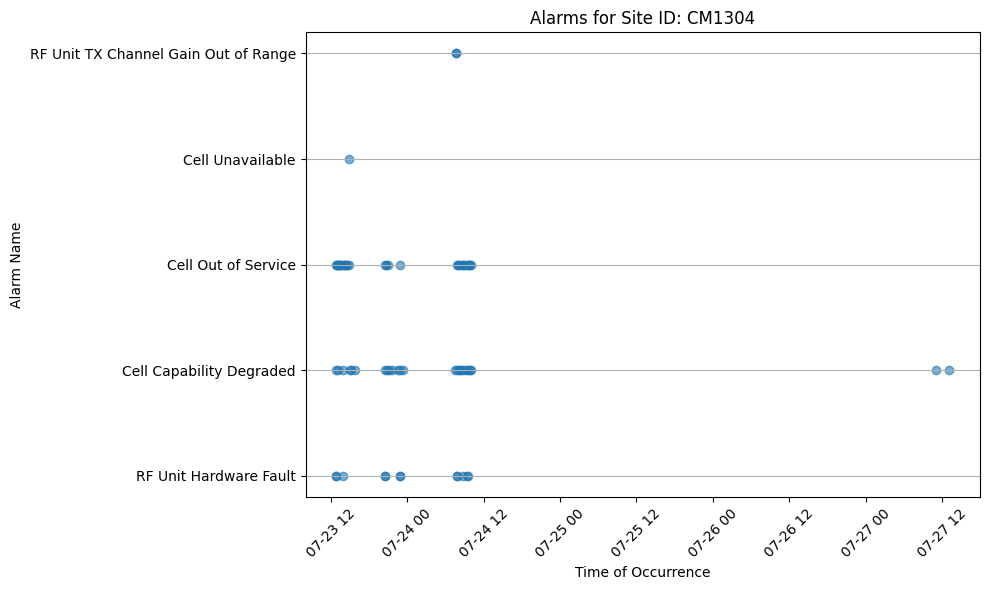

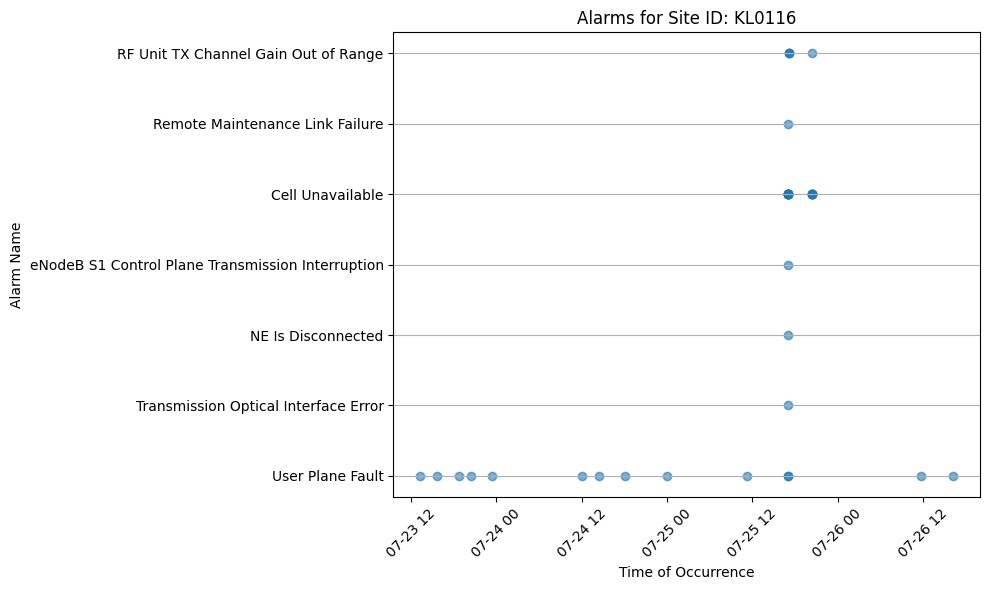

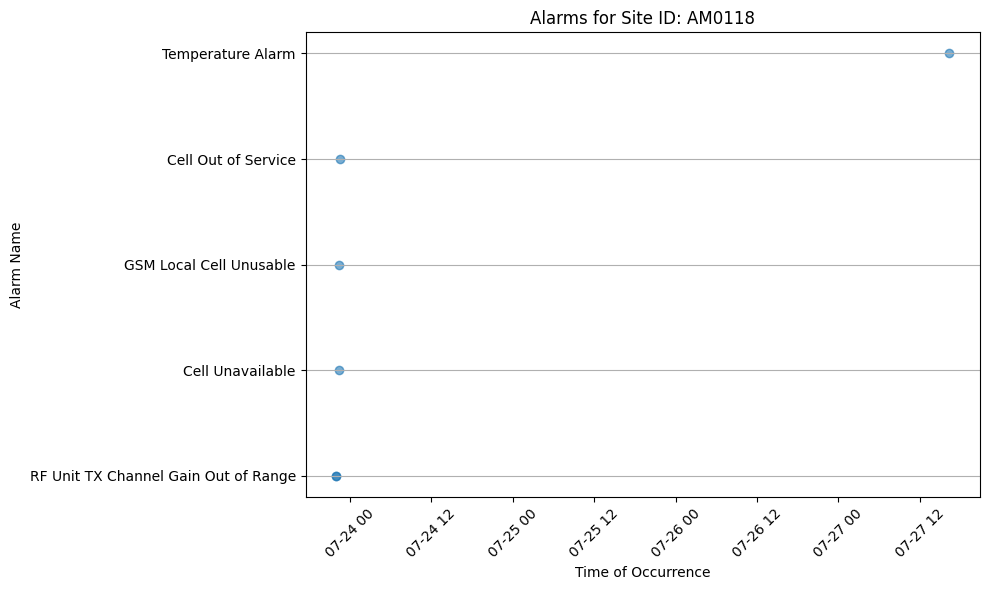

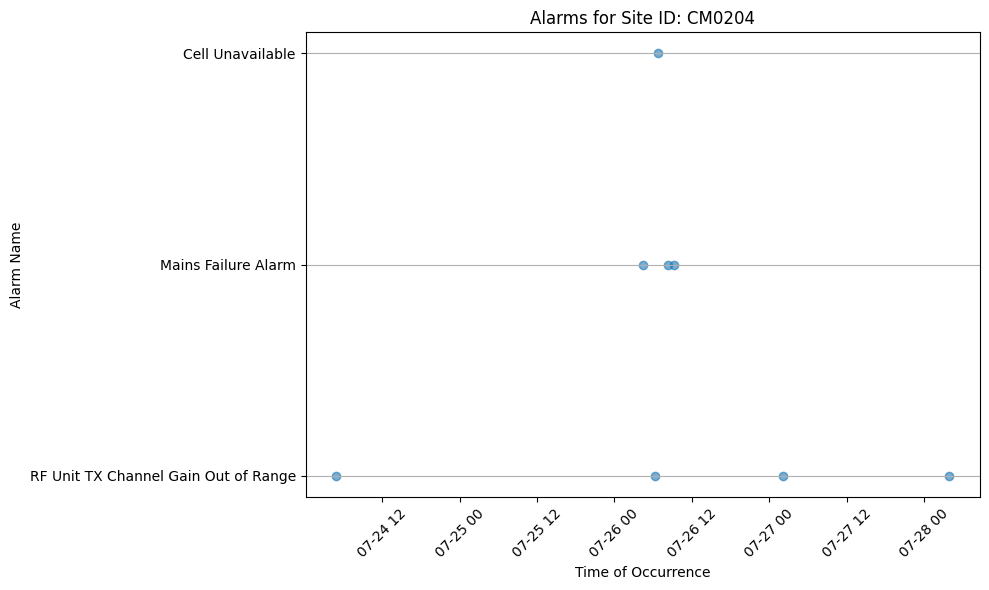

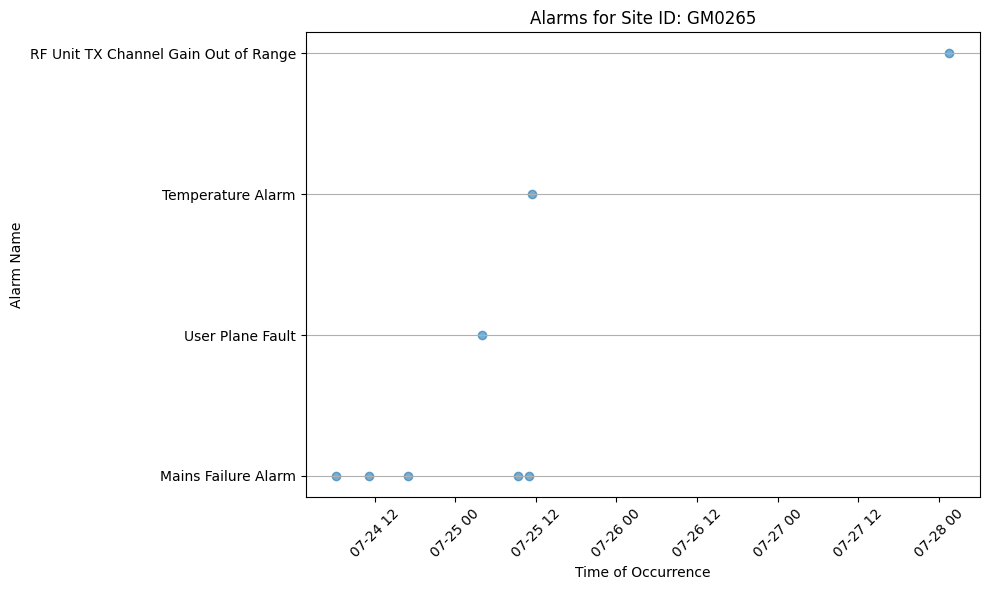

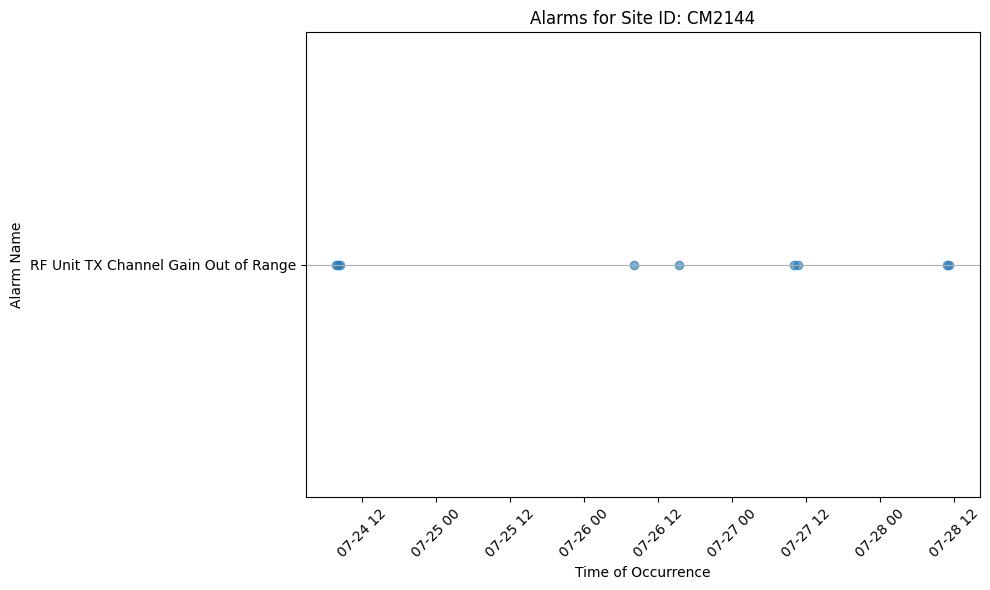

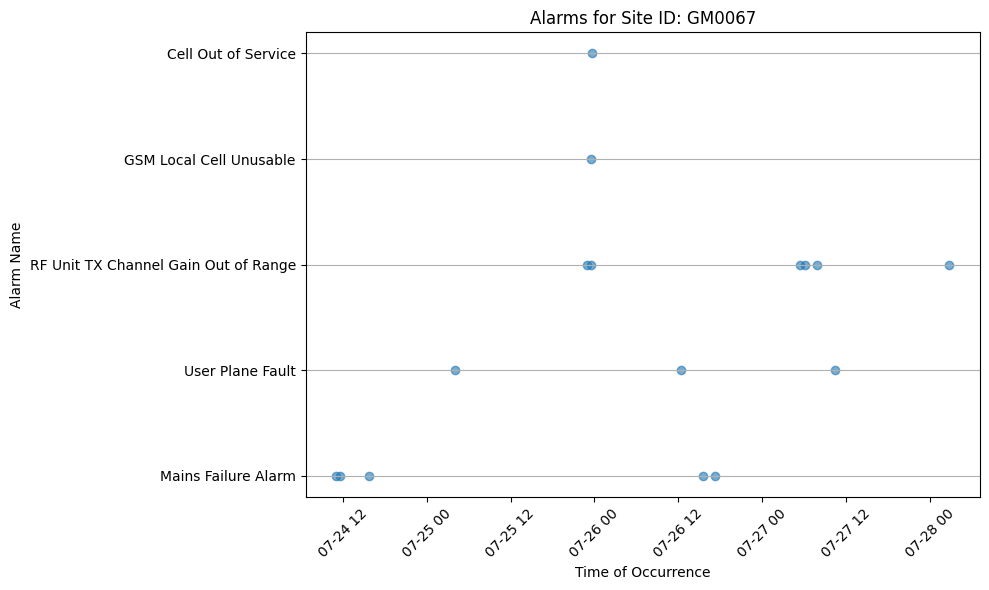

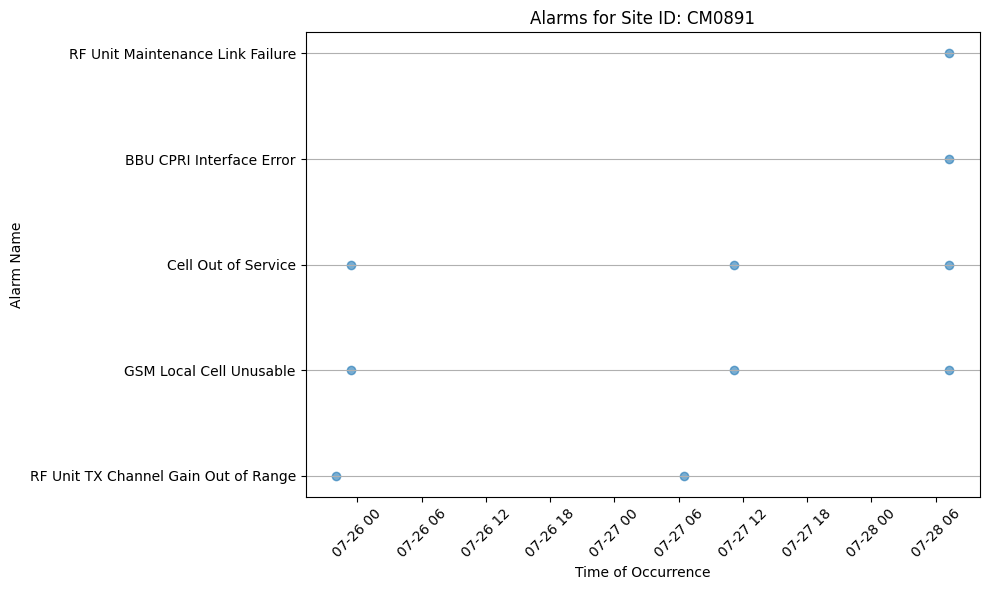

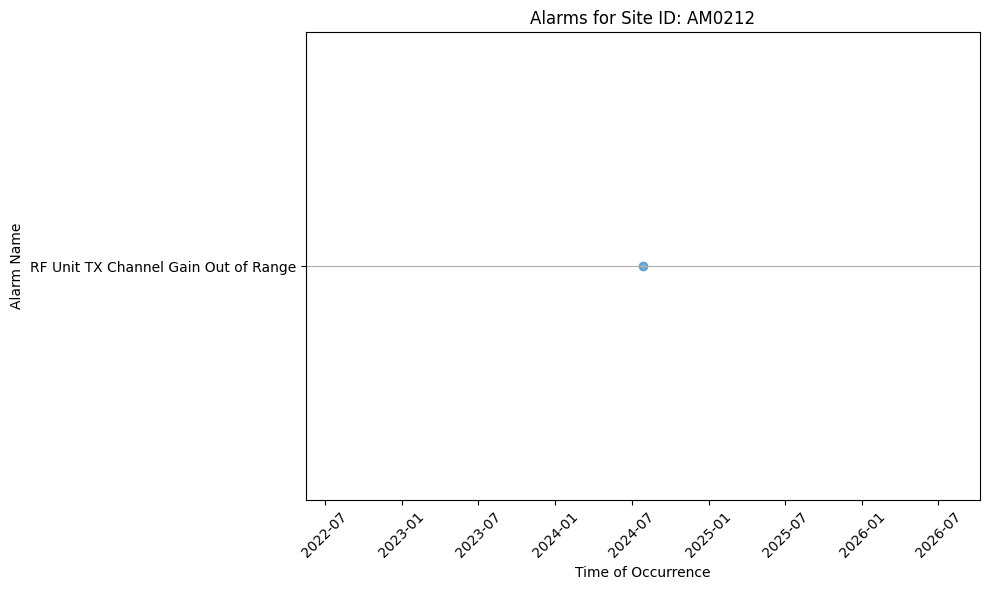

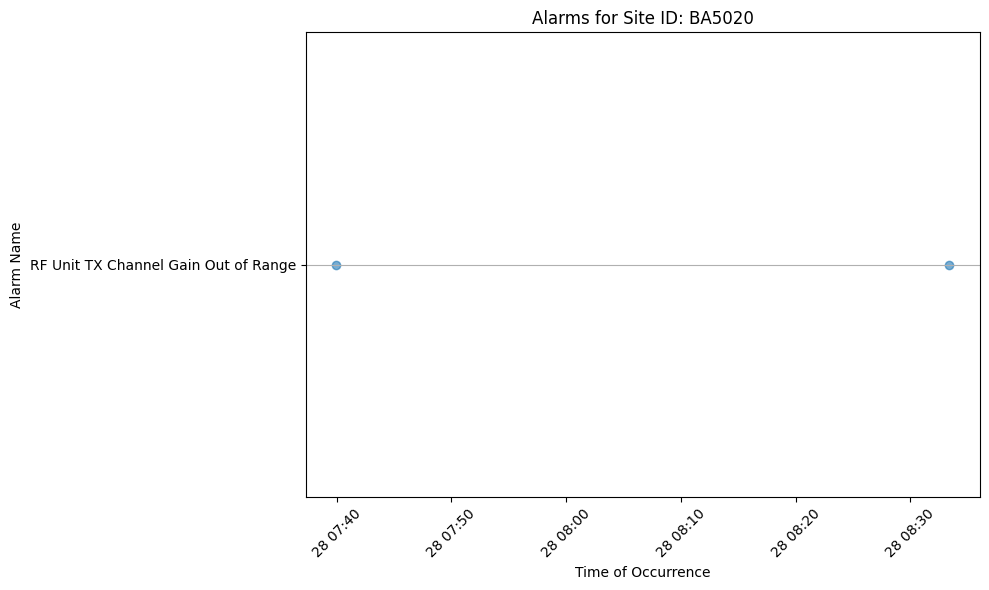

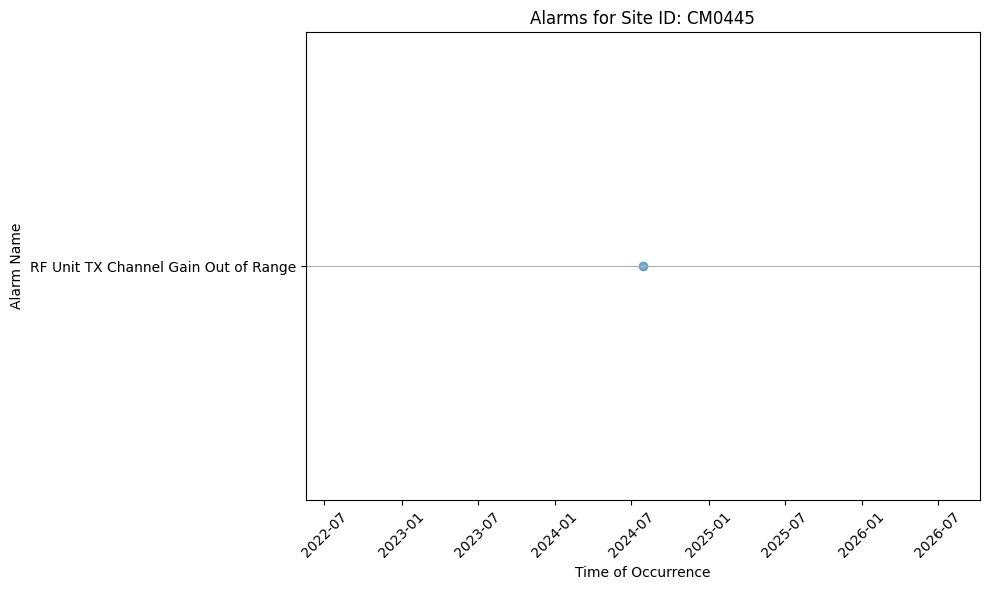

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive (if necessary)
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_25/3677_20240729_103909_1/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Sort by 'First Occurred On' in ascending order (earliest alarms first)
data = data.sort_values(by='First Occurred On', ascending=True)

# Convert 'First Occurred On' to datetime, handle errors and fill NaT with a default date
data['First Occurred On'] = pd.to_datetime(data['First Occurred On'], errors='coerce')

# Find all site IDs that had the alarm 'RF Unit TX Channel Gain Out of Range'
triggered_sites = data[data['Alarm Name'] == 'RF Unit TX Channel Gain Out of Range']['Site ID'].unique()

# Filter all alarms for these site IDs
filtered_alarms = data[data['Site ID'].isin(triggered_sites)]

# Loop through each site and plot their alarms
for site_id in filtered_alarms['Site ID'].unique():
    site_data = filtered_alarms[filtered_alarms['Site ID'] == site_id]

    # Create a new figure for each site
    plt.figure(figsize=(10, 6))
    plt.scatter(site_data['First Occurred On'], site_data['Alarm Name'], alpha=0.6)

    # Customize the plot
    plt.title(f'Alarms for Site ID: {site_id}')
    plt.xlabel('Time of Occurrence')
    plt.ylabel('Alarm Name')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Show the plot for the current site
    plt.tight_layout()
    plt.show()


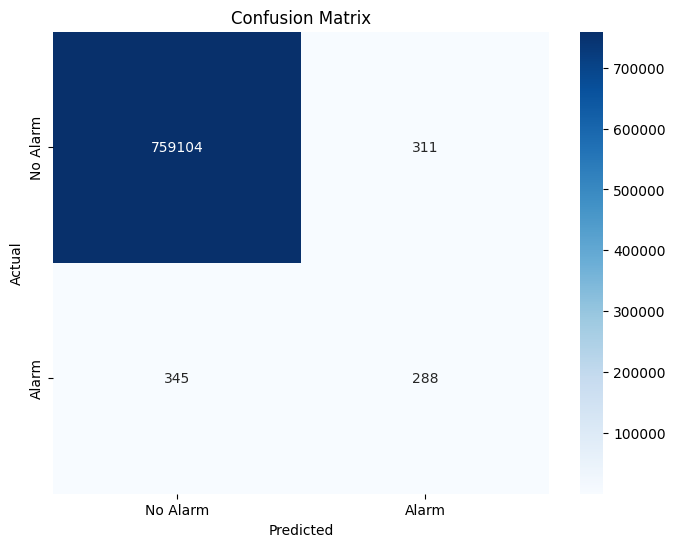

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    759415
           1       0.48      0.45      0.47       633

    accuracy                           1.00    760048
   macro avg       0.74      0.73      0.73    760048
weighted avg       1.00      1.00      1.00    760048



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Alarm', 'Alarm'], yticklabels=['No Alarm', 'Alarm'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
